### Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [55]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\bank-full.csv',delimiter= ';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA 

In [29]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [30]:
data.shape

(45211, 17)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [60]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 0


### Finding correlation

In [62]:
data.corr(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'balance'),
  Text(2.5, 0, 'day'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'campaign'),
  Text(5.5, 0, 'pdays'),
  Text(6.5, 0, 'previous')])

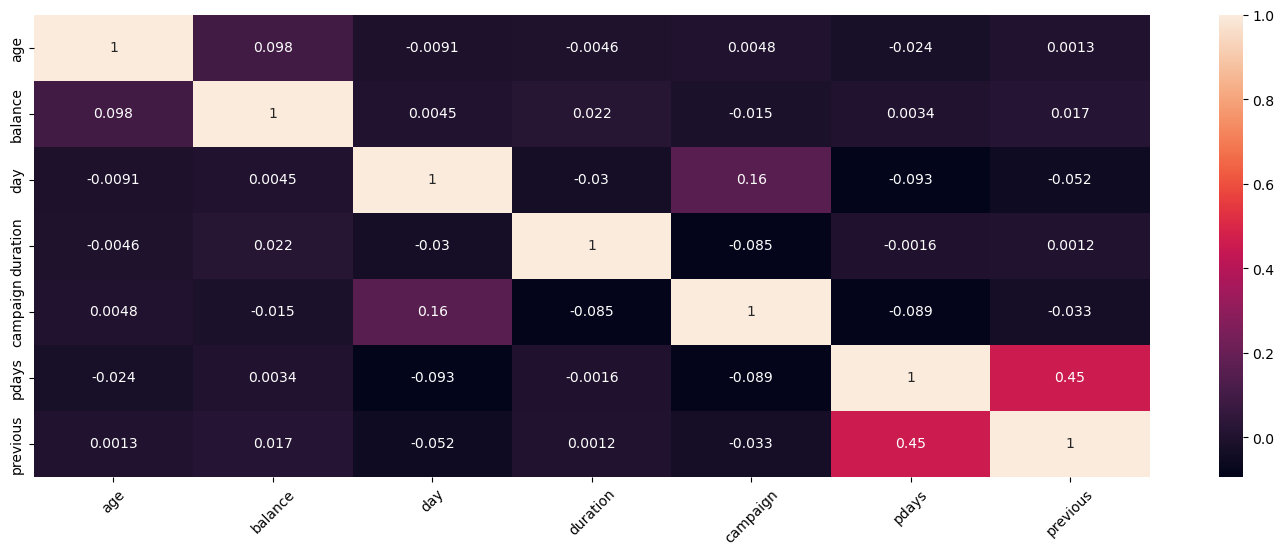

In [64]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(numeric_only= True), annot=True);
plt.xticks(rotation=45)

### Finding outliers

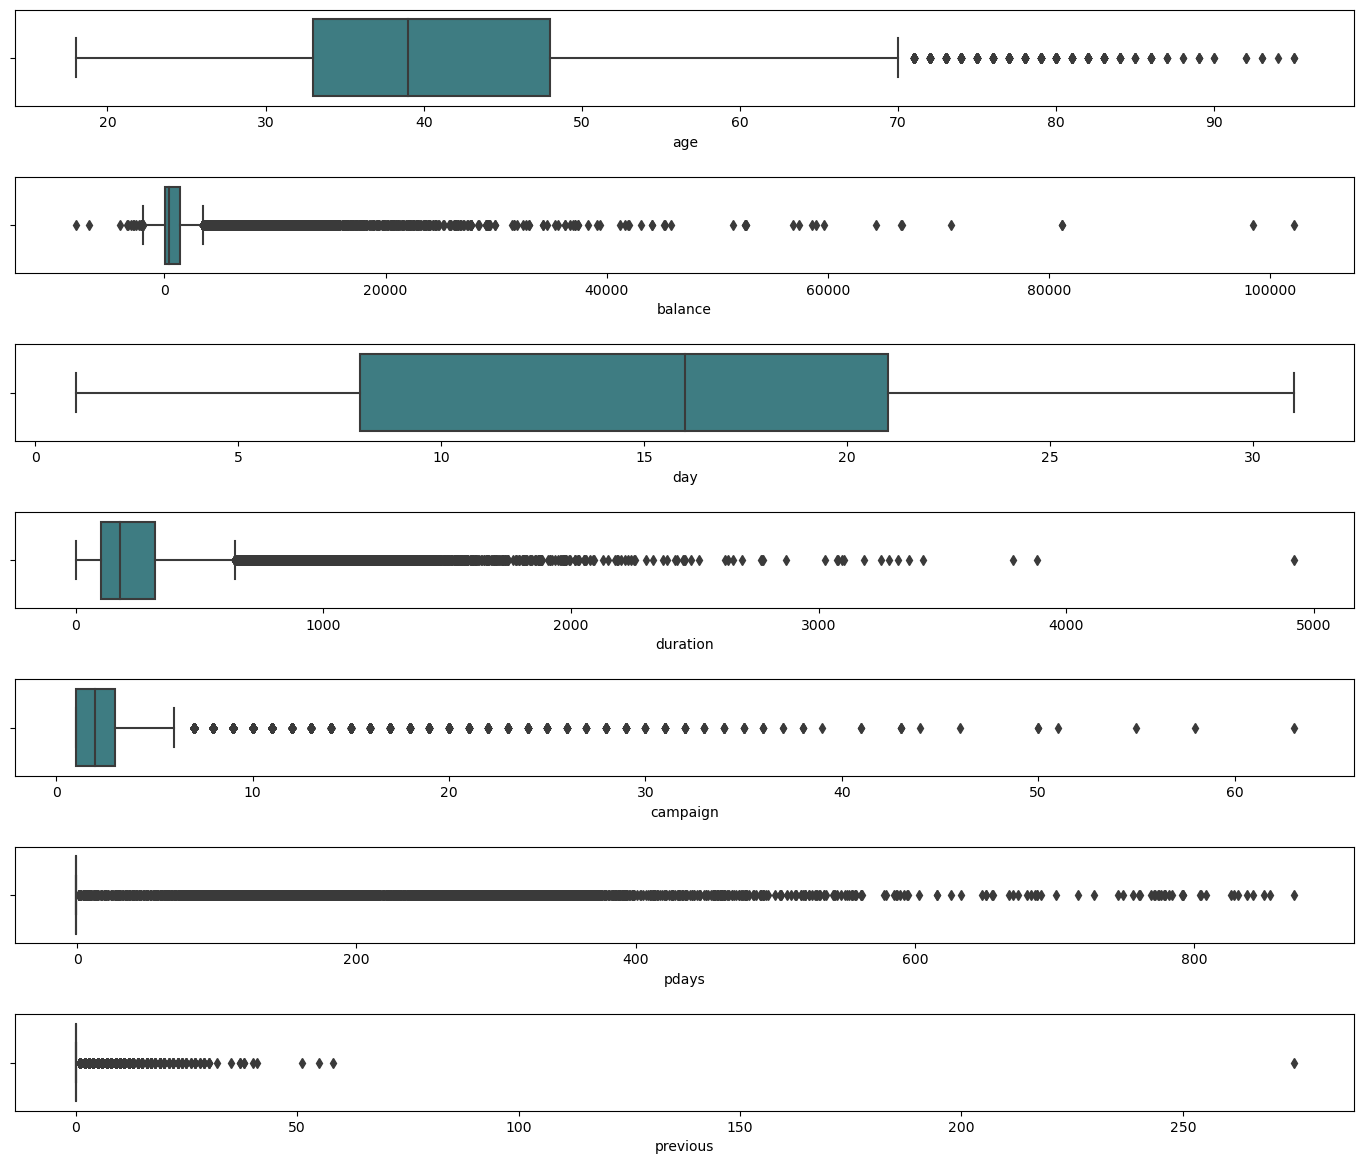

In [65]:
ot=data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

After seeing the graph we can say that there are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

### Barplot for categorical variables

Text(0.5, 1.0, 'Jobs')

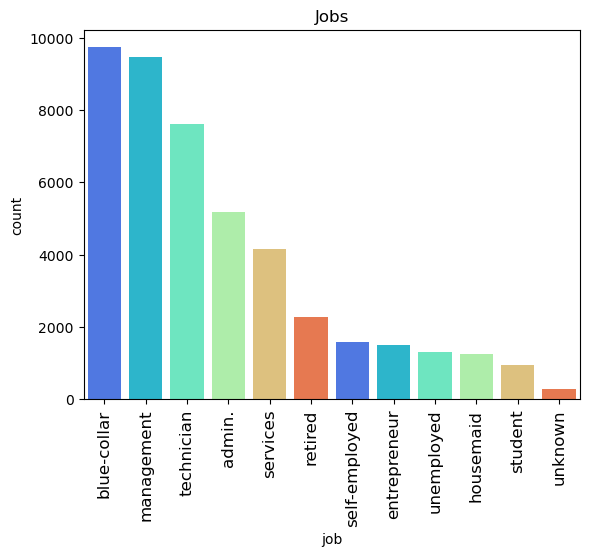

In [66]:
pal = sns.color_palette('rainbow')
sns.countplot(x='job', data=data, palette = pal, 
              order=data['job'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Jobs')

Text(0.5, 1.0, 'Marital Status')

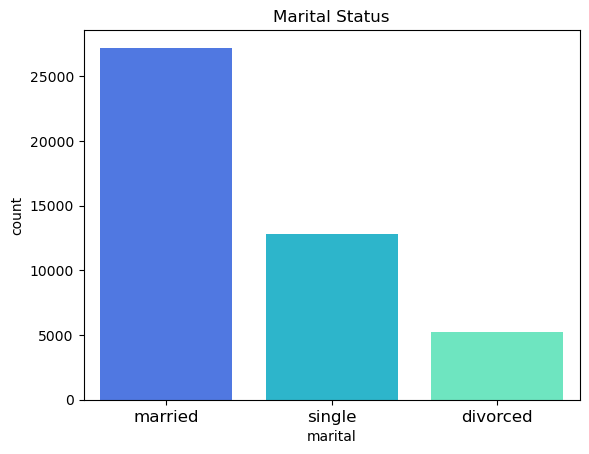

In [68]:
sns.countplot(x='marital', data=data, palette = pal, 
              order=data['marital'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

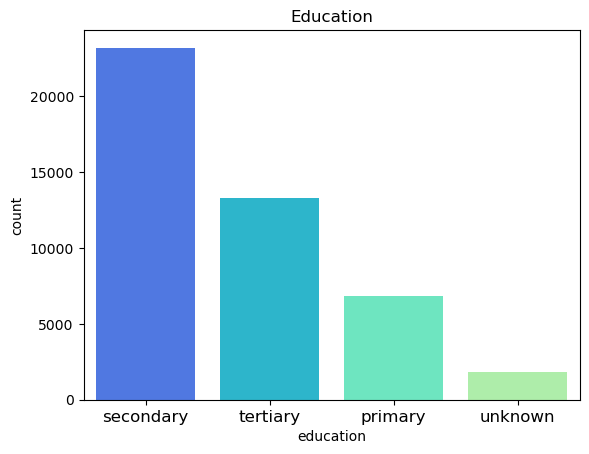

In [69]:
sns.countplot(x='education', data=data, palette = pal, 
              order=data['education'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Education')

Text(0.5, 1.0, 'Housing')

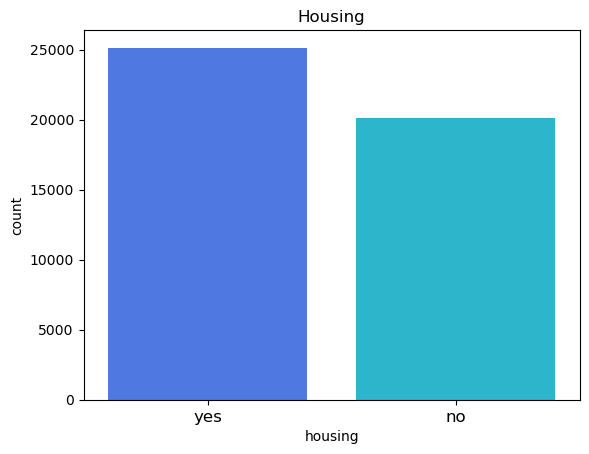

In [70]:
sns.countplot(x='housing', data=data, palette = pal, 
              order=data['housing'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Housing')


Text(0.5, 1.0, 'Loan')

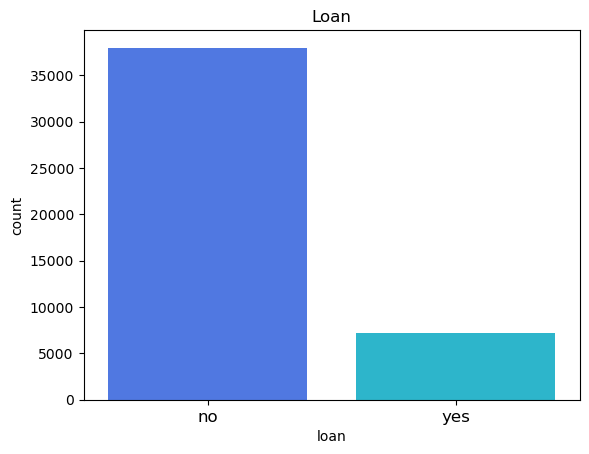

In [71]:
sns.countplot(x='loan', data=data, palette = pal, 
              order=data['loan'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Loan')

### Anaylsis of Response column

Text(0.5, 1.0, 'Whether the client has subscribed a term deposit or not ')

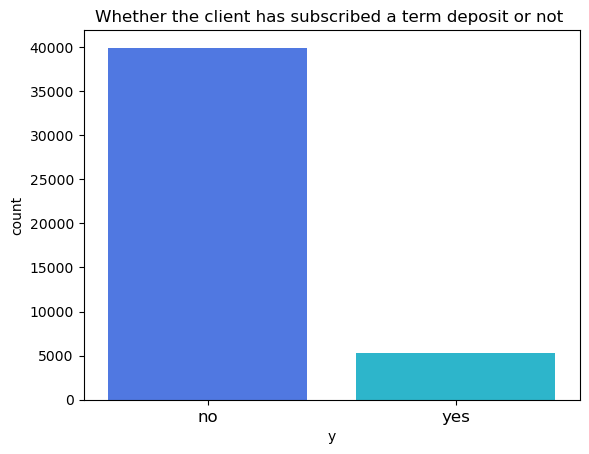

In [72]:
sns.countplot(x='y', data=data, palette = pal, 
              order=data['y'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has subscribed a term deposit or not ')

### Finding the missing values

In [32]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Finding duplicate values present in dataset

In [33]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [34]:
data[data.duplicated()].shape

(0, 17)

### Transformation

#### One-Hot Encoding of categrical variables

In [35]:
data1=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,no,29,yes,no,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,no,2,yes,yes,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,47,no,1506,yes,no,5,92,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,33,no,1,no,no,5,198,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,False,False,False,False,False,False,False,True,False,False
45207,71,no,1729,no,no,17,456,2,-1,0,...,False,False,False,False,False,False,False,True,False,False
45208,72,no,5715,no,no,17,1127,5,184,3,...,False,False,False,False,False,False,False,True,False,False
45209,57,no,668,no,no,17,508,4,-1,0,...,False,False,False,False,False,False,False,True,False,False


In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  bool  
 12  job_blue-collar      45211 non-null  bool  
 13  job_entrepreneur     45211 non-null  bool  
 14  job_housemaid        45211 non-null  bool  
 15  job_management       45211 non-null  bool  
 16  job_

In [37]:
# List of Numerical Variables
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
data[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


## Custom Binary Encoding of Binary o/p variables

In [38]:
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,False,False,False,False,False,False,False,True,False,False
45207,71,0,1729,0,0,17,456,2,-1,0,...,False,False,False,False,False,False,False,True,False,False
45208,72,0,5715,0,0,17,1127,5,184,3,...,False,False,False,False,False,False,False,True,False,False
45209,57,0,668,0,0,17,508,4,-1,0,...,False,False,False,False,False,False,False,True,False,False


### Model Building

In [39]:
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]

In [40]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

### Model Prediction

In [41]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [42]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


### Testing Model Accuracy

In [45]:
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39152,   770],
       [ 4127,  1162]], dtype=int64)

In [52]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39152+1162)/(39152+770+4127+1162)

0.891685651721926

In [53]:
classifier.predict_proba(x)[:,1] 

array([0.04415043, 0.02470598, 0.01819021, ..., 0.66946912, 0.07896329,
       0.10143938])

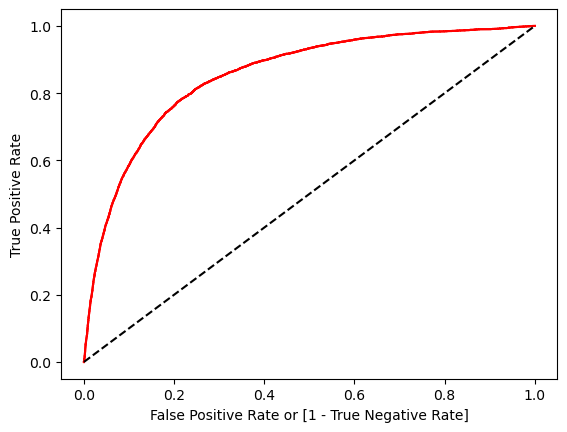

auc accuracy: 0.6002068279694848


In [56]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)